# Python Overview

Authors:
- Bernie Pope (VLSCI)
- Catherine de Burgh-Day, Dept. of Physics, The University of Melbourne


--------------------

## General information

- Python modules are stored in files containing a ".py" suffix (e.g solver.py).
- The main implementation of Python is called CPython (it is written in C). It is byte-code interpreted.
- Python can be used in two modes: interactive and scripted. In interactive mode you enter a program fragment and Python evaluates it immediately and then prints the result before prompting for a new input. The interactive prompt is usually rendered as the chevron ">>>". In scripted mode your program is stored in one or more files which are executed as one monolithic entity. Such programs behave like ordinary applications.
- Python has automatic memory management (via garbage collection). Memory is allocated automatically as needed and freed automatically when no longer used.

## Python 2 versus Python 3

Currently there are two distinct flavours of Python available:
- Python 2 (2.7.10 at the time of writing)
- Python 3 (3.4.3 at the time of writing)

Python 3 is the new and improved version of the language. Python 3 is not entirely backwards compatible, but the two versions share much in common. Version 2 is now in maintenance mode; new features will only be added to version 3. The public transition from 2 to 3 has been slower than some people would like. You are encouraged to use version 3 where possible. These notes are generally compatible with both versions, but we will point out key differences where necessary.

## Indentation for grouping code blocks

- Python uses indentation to group code blocks. Most other languages use some kind of brackets for grouping.
- The recommended style is to use 4 space characters for a single indent (thus 8 spaces for two indents and so forth).
- You are encouraged not to use tabs for indentation because there is no standard width for a tab.
- Most good text editors can be configured so that that tab key is rendered as 4 space characters when editing Python code.

## Style Guide

A popular style guide for Python is known as [PEP 0008](https://www.python.org/dev/peps/pep-0008/), there is a corresponding tool called [pep8](https://pypi.python.org/pypi/pep8) which will check your code against the guide and report any transgressions.

## Example, Python compared to C:

Python program for computing factorial:


In [175]:
# Compute factorial of n,
# assuming n >= 0

def factorial(n):
    result = 1
    while n > 0:
        result *= n
        n -= 1
    return result

In [176]:
print(factorial(10))

3628800


C program for computing factorial:

```C
#include <stdio.h>

/* Compute factorial of n,
   assuming n >= 0         */

int factorial(int n) {
    int result = 1;
    while (n > 0) {
        result *= n;
        n -= 1;
    }
    return result;
}

int main(void) {
    printf("%d\n", factorial(10));
}
```

### Things to note:

- The difference in commenting style.
- C programs are statically typed, and you must declare the type of functions and variables. Python is dynamically typed.
- Code blocks in C are grouped by braces `{ };` Python uses indentation for grouping.
- The C program must have a `main` function. Python does not require a `main` function, it just executes the top-level statements of the module.
- The result returned by the C function is limited to the size of a machine integer (say 32 bits). However, the result returned by the Python function is unlimited in its size - it can compute arbitrarily large factorials (up to the limit of the available memory in your computer).

## Comments

Program comments start with a hash character `"#"` and continue until the end of the line. There are no multi-line comment markers, but that can sometimes be faked with multi-line string literals.

Examples:

In [177]:
# This is a comment.
# This is another comment.

In [178]:
x = 5 # This is a comment which follows some code.

In [179]:
'''This is
a multi-line
string literal
which can sometimes act like
a
comment.
'''

'This is\na multi-line\nstring literal\nwhich can sometimes act like\na\ncomment.\n'

## Running a Python program

There are many ways to run Python code:
- You can run the interpreter in interactive mode. On Unix (Linux, OS X) you can run the python command at the command line.
- If you have Python code stores in a file, say example.py, you can run it from the command line like so: `python example.py`.
- You can use one of several integrated programming environments. Python ships with a fairly minimal one called IDLE, though many scientists prefer the more comprehensive IPython (now called Jupyter).
- If your Python code was installed as a package (see below), then it may be executed like an ordinary application without the user being aware of how the program was implemented.

## Objects and types

- Every value in Python is an object (including functions!).
- Objects can have attributes and methods, which are accessed via the dot `"."` operator.
- All objects have a type.
- Types are also objects!
- Python is dynamically typed: you may get type errors at runtime but never at compile time.
- `type(x)` returns the type of `x`.
- Python variables may be assigned to values of different types at different points in the program.

### Interactive examples:

Create a list, assign to the variable x:

In [180]:
x = [3, 1, 2, 3]

Ask for the type of the value assigned to x:

In [181]:
type(x)

list

Ask for the type of the first item in the list (an integer):

In [182]:
type(x[0])

int

Count the number of times 3 appears in the list by calling the `count` method:

In [183]:
x.count(3)

2

Sort the contents of the list in-place. Note that this mutates the list object! Also note that Python does not print the result in this case:

In [184]:
x.sort()

Ask Python to show the value of the list assigned to the variable x (note it is now sorted):

In [185]:
x

[1, 2, 3, 3]

Assign x to an object of a different type (a float):

In [186]:
x = 3.142

In [187]:
type(x)

float

## Booleans

- Represent truth values
- Values: `True`, `False`
- Type: `bool`
- Operators: `and`, `or`, `not`. See [Boolean Operations — and, or, not](https://docs.python.org/3/library/stdtypes.html#boolean-operations-and-or-not) in the Python documentation for more details.
- `bool(x)` will convert `x` to a boolean. The heuristic is that empty things and zero-ish things are `False`, everything else is `True` (but the user can override for their own types). See [truth value testing](https://docs.python.org/3/library/stdtypes.html#truth-value-testing) in the Python documentation for more details.
- False values:
    - `False`
    - `0` (zero integer)
    - `0.0` (zero float)
    - `{}` (empty dictionary)
    - `()` (empty tuple)
    - `[]` (empty list)
    - `''` (empty string)
    - `None`
- True values:
    - everything which is not considered False
    
In numerical contexts `True` is considered equal to the integer `1` and `False` is considered equal to the integer `0`. However, these conversions are a common cause of bugs and should be avoided.

Python will automatically test the truthiness of a value if it appears in a boolean context.

Interactive examples:

In [188]:
not True

False

In [189]:
not False

True

In [190]:
# empty is converted to False in boolean contexts
not ()

True

In [191]:
not [1,2,3]

False

In [192]:
True and False

False

In [193]:
True or False

True

The example below may be a little bit surprising. See: [Boolean Operations — and, or, not](https://docs.python.org/3/library/stdtypes.html#boolean-operations-and-or-not)

In [194]:
True and ()

()

## Conditional Statements

Conditional statements use the keywords: `if`, `elif`, `else`. The syntax for a conditional statement is:

```Python
if expression:
    statement-block
elif expression:
    statement-block
...
else:
    statement-block
```

A conditional statement must have exactly one `if` part. It may have zero or more `elif` parts, and a single optional `else` part at the end.

The `if` and `elif` parts test the value of their boolean expressions. If the expression evaluates to something which is `True` or can be converted to `True` (see the rules for Booleans above) then the statement block immediately beneath that part is executed. Otherwise the following condition (if any) is tried. The `else` part, if it exists, is always and only executed if no preceding condition was `True`.

In [195]:
if []:
    print("The condition considered True")
else:
    print("The condition considered False")

The condition considered False


In [196]:
if [1]:
    print("The condition considered True")
else:
    print("The condition considered False")

The condition considered True


## Numbers and basic mathematics

### Integers

- Represent whole negative and positive numbers (and zero).
- The range of integer values is unbounded (up to some limit defined by how much memory you have on your computer).
- Python 2 distinguishes between two integer types `int` and `long`, and automatically promotes `int` to `long` where necessary, whereas Python 3 considers them all one type called `int`.
- Base ten is the default literal notation: `42` (means `(4 * 10) + 2`)
- Hexadecimal literals start with `0x`, octal literals start with `0o`, binary literals start with `0b`.
- `int(x)` will try to convert `x` to an integer, `x` can be another numeric type (including booleans) or a string. You may specify an optional base for the conversion.

In [197]:
2 ** 200

1606938044258990275541962092341162602522202993782792835301376L

In [198]:
0x10

16

In [199]:
0b10

2

In [200]:
-0 == 0

True

In [201]:
# Convert a string to an integer
int("123")

123

In [202]:
# This conversion fails with an exception
int("3.142")

ValueError: invalid literal for int() with base 10: '3.142'

### Floating Point Numbers

- Represent a finite approximation to the real numbers.
- Type: `float`.
- (On most platforms) Python uses IEEE-754 double precision floating point numbers which provide 53 bits of precision.
- `sys.float_info` contains details about max, min, epsilon etcetera.
- Literals can be in ordinary notation or in exponential notation:
    - Ordinary: `3.142`
    - Exponential: 314.2e-2
- Ordinary notation requires a point `"."`, but digits following the point are optional.
- Exponential notation does not require a point unless you have a fractional component.
- `float(x)` will try to convert `x` to a floating point number, `x` can be another numeric type (including booleans) or a string.
- Numeric operators will automatically convert integer arguments to floating point in mixed-type expressions.
- In Python 3 the division operator computes a floating point result for integer arguments. However, in Python 2 it computes an integer result for integer arguments.

In [203]:
type(3.142)

float

In [204]:
type(12)

int

In [205]:
3.142 + 12

15.142

In [206]:
3.142 == 314.2e-2

True

In [207]:
3. == 3.0

True

In [208]:
# Divide by zero
1/0

ZeroDivisionError: integer division or modulo by zero

In [209]:
# The value of this expression will depend on which version of Python you are using.
# In version 2 it will return the integer 3
# In version 3 it will return the floating point number 3.3333...
10 / 3

3

In [210]:
# Convert a string to a float, works just fine with strings that look like integers
float("123")

123.0

In [211]:
float("3.142")

3.142

### Complex Numbers

- Represent a finite approximation to the complex numbers.
- Type: `complex`
- A pair of floating point numbers: real +/- imaginary.
- The real part is optional (defaults to 0). The imaginary part is followed immediately by the character `j`.

In [212]:
5j + 3j

8j

In [213]:
type(5j + 3j)

complex

In [214]:
2-5j

(2-5j)

In [215]:
2-5j + 3j

(2-2j)

## Numerical operators


| Name | Operation | Precedence | Associativity | Notes |
|:----:|-----------|------------|---------------|-------|
| +    | add       | low        | left          | Can also be used to concatenate strings together. |
| *    | multiply  | medium     | left          |        |
| -    | subtract  | low        | left          |        |
| /    | divide    | medium     | left          | In Python 3 the result is always a floating point number. In Python 2 the result is an integer if both operands are integers. |
| //   | floor-divide | medium  | left          | divide then floor, result is an integer |
| `**` | exponent  | high       | right         |        |
| %    | modulus   | medium     | left          | remainder after division |

In [216]:
# Compare the value of this expression to the next one
3 + 4 * 5

23

In [217]:
# Compare the value of this expression to the previous one
(3 + 4) * 5

35

In [218]:
10 // 3

3

In [219]:
10 % 3

1

In [220]:
# Compare the value of this expression to the next one
2 ** 3 ** 4

2417851639229258349412352L

In [221]:
# Compare the value of this expression to the previous one
(2 ** 3) ** 4

4096

## Strings

- Represent text
- Type: `str`
- In Python 3, the `str` type contains [Unicode](https://en.wikipedia.org/wiki/Unicode) characters.
- In Python 2, the `str` type contains [ASCII](https://en.wikipedia.org/wiki/ASCII) characters (sometimes called byte strings). Python 2 has a separate type for unicode strings, the type is called unicode; literals of this type are prefixed by the letter `u`.
- String literals must be quoted. There are 3 quoting styles:
   - single quote characters: `'hello'`
   - double quote characters: `"hello"`
   - triple quote characters: `'''hello'''` (three single quotes in a row) or `"""hello"""` (three double quote characters in a row)
- The single quote and double quote versions of strings have the same value. The purpose of the different quotation styles is to make it convenient to have literal quotation marks inside strings (avoiding the need to escape the quote character).
- Triple quoted strings can be written on multiple lines. The line breaks will be preserved within the string. Useful for docstrings (see section on functions).
- The usual set of escape characters are supported:
   - `\n` newline
   - `\t` tab
   - `\\` backslash
   - `\'` single quote
   - `\"` double quote
   - and many more
- Python does not have a separate type for representing individual characters. Instead you use strings of length one.
- Strings are iterable. If you iterate over a string (using a for loop) you process it one character at a time from left to right.
- Strings can be indexed to obtain individual characters, e.g. `s[5]` (the result of which is a string of length one).
- Indices are zero-based (but you may also use negative indices to access items with respect to the right end of the string).
- Strings are immutable: you cannot modify a string once it has been created.

In [222]:
"This string contains an inverted comma which won't be a problem inside quotation marks"

"This string contains an inverted comma which won't be a problem inside quotation marks"

In [223]:
'this "quote" will work'

'this "quote" will work'

In [224]:
'this isn't going to work though'

SyntaxError: invalid syntax (<ipython-input-224-e449613dbda4>, line 1)

In [225]:
type("hello")

str

In [226]:
"hello" == 'hello'

True

In [227]:
'''This string
is on
multiple
   lines'''

'This string\nis on\nmultiple\n   lines'

In [228]:
"bonjour".upper()

'BONJOUR'

In [229]:
len("bonjour")

7

In [230]:
"bonjour".startswith("b")

True

In [231]:
"cat,sat,flat".split(",")

['cat', 'sat', 'flat']

In [232]:
# Print the first 5 Chinese unicode characters
# Note: Python 2 requires the 'u' at the front of the string, but Python 3 does not 
# (it is allowed in Python 3 but not required)
print(u'\u4E00\u4E01\u4E02\u4E03\u4E04')

一丁丂七丄


In [233]:
x = "floyd"

In [234]:
x[0]

'f'

In [235]:
"hello" + " " + "world"

'hello world'

### Example program using strings

In [238]:
# Prompt the user to input a string:
input = raw_input("Enter string: ")

# Count the number of vowels in the input string
vowels = 'aeiou'
count = 0 
for char in input:
    if char in vowels:
        count += 1

# Print the count to the standard output
print(count)

Enter string: hello
2


## Lists

- Represent mutable ordered sequences of values.
- Type: `list`
- List literals are written in between square brackets, e.g. `[1, 2, 3]`
- List elements can be objects of any type (including other lists).
- Like strings, lists can be indexed like so: `x[3]`
- Indices are zero-based (but you may also use negative indices to access items with respect to the right end of the list).
- Lists are mutable. You can update items, delete items and add new items.
- Indexing into a list is a constant time (amortised) operation.

In [239]:
type([1, 2, 3])

list

In [240]:
x = []

In [241]:
len(x)

0

In [242]:
x.append("hello")

In [243]:
x

['hello']

In [244]:
len(x)

1

In [245]:
x[0]

'hello'

In [246]:
x.insert(0, True)

In [247]:
x

[True, 'hello']

In [248]:
del x[1]

In [249]:
x

[True]

In [250]:
x += [42, "Newton", 3.142]

In [251]:
x

[True, 42, 'Newton', 3.142]

## Dictionaries

- Represent finite mappings from **keys** to **values**.
- Are implemented as hash tables. The key objects must be hashable (which rules out mutable objects, such as lists).
- Type: `dict`
- Dictionary literals are written inside curly brackets, with key-value pairs separated by colons: e.g. `{12: "XII", 6: "VI"}`
- Dictionaries can be indexed by keys. If the key exists in the dictionary its corresponding value is returned, otherwise a `KeyError` exception is raised.
- The cost of indexing a dictionary is proportional to the time taken to hash the key. For many keys this can be considered constant time. For variable sized objects, such as strings, this can be considered to be proportional to the size of the object.
- Iterating over a dictionary yields one key at a time. All keys in the dictionary are visited exactly once. The order in which the keys are visited is arbitrary.
- You may test if an object is a key of a dictionary using the `in` operator.

In [252]:
type({ 12: "XII", 6: "VI" })

dict

In [253]:
friends = {}

In [254]:
friends['Fred'] = ['Barney', 'Dino']

In [255]:
friends

{'Fred': ['Barney', 'Dino']}

In [256]:
friends['Fred']

['Barney', 'Dino']

In [257]:
# 'Barney' is not a key in the dictionary
friends['Barney']

KeyError: 'Barney'

In [258]:
friends

{'Fred': ['Barney', 'Dino']}

In [259]:
friends.keys()

['Fred']

In [260]:
friends.values()

[['Barney', 'Dino']]

In [261]:
'Dino' in friends

False

In [262]:
'Wilma' in friends

False

### Example program using a dictionary

In [263]:
# Compute and print a histogram of a sequence of integers

integers = [1, 3, 4, 1, 1, 4, 3, 4, 3, 1, 1, 1, 1, 2]

histogram = {}

# Iterate over each integer
for next_integer in integers:
    # Update the histogram accordingly
    if next_integer in histogram:
        # We've seen this integer before
        histogram[next_integer] += 1
    else:
        # First occurrence of this integer in the input
        histogram[next_integer] = 1

# Print each key: value pair in the histogram in ascending
# sorted order of keys
for key in sorted(histogram):
    print("{} {}".format(key, histogram[key]))

1 7
2 1
3 3
4 3


## Tuples

- Represent immutable ordered sequences of values.
- Very much like lists except they cannot be modified once created.
- Type: `tuple`
- Literals are written in between parentheses: `(1, 2, 3)`
- They can be used as keys in dictionaries (unlike lists).

In [264]:
x = (1, True, 'hello')

In [265]:
type(x)

tuple

In [266]:
x[2]

'hello'

In [267]:
len(x)

3

In [268]:
# Tuples are immutable, so you cannot modify them once created
x[1] = 42

TypeError: 'tuple' object does not support item assignment

In [269]:
dictionary = {}

In [270]:
# Tuples can be keys of dictionaries
dictionary[(1,2)] = 5

In [271]:
dictionary[(1,2)]

5

In [272]:
# Lists cannot be keys of dictionaries
dictionary[[1,2]] = 5

TypeError: unhashable type: 'list'

## Sets

- Sets are unordered collections of objects, containing no duplicates.
- Type: `set`
- Set literals are written in between curly brackets `{ ... }`, but don't confuse them with dictionaries. Sets only have values, not keys-and-values.
- Sets support standard mathematical operations such as union, intersection and difference.
- Sets support fast insertion and lookup.

In [299]:
x = {1, True, 'foo'}

In [300]:
type(x)

set

In [309]:
len(x)

2

In [310]:
x.add(12)

In [311]:
x

{True, 12, 'foo'}

In [312]:
'foo' in x

True

In [313]:
42 in x

False

In [314]:
x.union({88, None})

{None, True, 12, 88, 'foo'}

In [315]:
x.intersection({1,3})

{1}

In [316]:
x.difference({'foo', 99})

{True, 12}

## Loops

### While loops

- Iterate until condition is `False`.
- Syntax:
```Python
while expression:
    statement_block
```
- The value of the boolean expression is tested. If it evaluates to `True` then the statement block is executed once, before repeating the loop. If it evaluates to `False` then the program continues execution immediately after the loop.

In [273]:
def factorial(n):
    result = 1
    while n > 0:
        result *= n
        n -= 1
    return result

In [274]:
factorial(10)

3628800

### For loops

- Iterate over each item in a collection (e.g. list, string, tuple, dictionary, file).
- Syntax:
```Python
for variable in expression:
    statement_block
```
- Each item from the iterator expression is selected and assigned to the variable, then the statement block is executed. The loop ends when every item in the iterator has been visited.
- The order of items visited in the iterator depends on the type of the iterator. Lists, strings and tuples proceed in a left-to-right fashion. Files proceed one line at a time. Dictionaries proceed in an arbitrary order.
- The `range()` function is useful for generating iterators of numbers within a range. Note that the lower bound is inclusive and the upper bound is exclusive.

In [275]:
def factorial(n):
    result = 1
    for item in range(1, n + 1):
        result *= item
    return result

In [276]:
factorial(10)

3628800

### Break and continue

- Both types of loops support the `break` and `continue` keywords.
- `break` terminates the loop immediately.
- `continue` jumps immediately back to the start of the loop.
- They can sometimes simplify the conditional logic of a loop, but should be used sparingly.

## Functions

- Allow you to define reusable abstractions. Sometimes called procedures.
- Are generally defined at the top level of a module, and can also be nested.
- Type: `function`
- Named functions are bound to a variable name and may have complex bodies.
- Anonymous functions are used in-line, and may only have expression bodies.
- Named function syntax:
```Python
def variable(parameter_list):
    statement_block
```
- Anonymous function syntax:]
```Python
lambda parameter_list: expression
```

In [298]:
def is_leap_year(year):
    if year % 4 == 0 and year % 100 != 0:
        return True
    else:
        return year % 400 == 0

for year in range(2000, 2020 + 1):
    result = is_leap_year(year)
    print("{} {}".format(year, result))

2000 True
2001 False
2002 False
2003 False
2004 True
2005 False
2006 False
2007 False
2008 True
2009 False
2010 False
2011 False
2012 True
2013 False
2014 False
2015 False
2016 True
2017 False
2018 False
2019 False
2020 True


In [278]:
squared = lambda x: x**2

In [279]:
type(squared)

function

In [280]:
squared(2)

4

## Input and output

- The `print` function is useful for displaying text (and other values converted to text).
- In Python 2 `print` is a special keyword. In Python 3 it is a function defined in the builtins.
- Fancy string formatting can be done with the format method on strings. Older Python code uses the string interpolation operator for the same task `%`, but its use is now discouraged.
- Files must be opened before than can be manipulated. A file can be opened in different modes: read `"r"`, write `"w"`, read `"r+"`, and append `"a"`.  Opening a new file in write or append modes creates a new file. Opening an existing file in write mode overwrites its contents from the start. Opening an existing file in append mode adds new content at the end of the old content.
- When you are finished processing a file you should close it as soon as possible. Closing a file releases limited operating system resources, and ensures that any pending buffered writes a flushed to the storage system.
- Certain file types have libraries for convenient processing. One example is the `csv` (comma separated values) library for processing tabular data. It is very handy for working with spreadsheets.
- The command line arguments of a Python program are contained in a list called `sys.argv` (it is a variable exported from the sys module). For complex program you should consider using a command line argument parsing library such as [argparse](https://docs.python.org/3/library/argparse.html).


```
# Count the number of words and lines in a file

import sys

# Get the input file name from the command line arguments
filename = sys.argv[1]

# Open the file
file = open(filename)

# Count the number of lines in the file
num_lines = 0
num_words = 0

for line in file:
    num_lines += 1
    num_words += len(line.split())

file.close()

print("Number of lines and words in {}: {} {}" \
        .format(filename, num_lines, num_words))
```

## Advanced topics

### Comprehensions

- Comprehensions provide concise syntax for building collections such as lists, dictionaries and sets

In [318]:
# a list comprehension
[x ** 2 for x in range(10) if x > 4]

[25, 36, 49, 64, 81]

In [320]:
# a set comprehension
{ char for char in "fat cat sat flat"}

{' ', 'a', 'c', 'f', 'l', 's', 't'}

In [321]:
# a dictionary comprehension
{ n: n % 2 == 0 for n in range (10)}

{0: True,
 1: False,
 2: True,
 3: False,
 4: True,
 5: False,
 6: True,
 7: False,
 8: True,
 9: False}

### Classes

- Classes allow you to define your own types.
- Class definitions may define methods for the type.
- A class may inherit, and possibly override, some functionality from a superclass.
- Syntax:
```Python
class variable(superclass_list):
    body
```
- The name of the class is given by the variable in the definition. The superclass list defines the superclasses of the new class (very often the base type object is used). The body of the class typically defines one or more methods.
- Instances of classes are created by calling the class name as if it were a function.
- If defined, the special method called `__init__` is used to initialise a newly created instance of a class.
- The first parameter to each method is the object upon which the method was called. The convention is to use the variable called `self`, however any variable name will do. Many object oriented languages make this variable an implicit parameter called `this`.

In [281]:
from math import sqrt, acos

class Vector(object):
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z

    def magnitude(self):
        return sqrt(self.x ** 2 + self.y ** 2 + self.z ** 2)

    def normalise(self):
        magnitude = self.magnitude()
        if magnitude == 0:
            # Somehow we have a degenerate vector.
            return self
        else:
            return self / self.magnitude()

    def angle(self, other):
        dp = self.dot_product(other)
        return acos(dp / self.magnitude() * other.magnitude())

    def dot_product(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

In [282]:
v1 = Vector(0.0, 0.0, 0.0)

In [283]:
v2 = Vector(1.0, 2.0, 3.0)

In [284]:
v3 = Vector(10.0, 12.0, -3.0)

In [285]:
v1.magnitude()

0.0

In [286]:
v2.magnitude()

3.7416573867739413

In [287]:
v3.dot_product(v2)

25.0

### Exceptions

- Exceptions allow Python programs to handle erroneous program conditions.
- An exception is raised (or thrown) at the point of the error and handled (or caught) at some other place in the program.
- Exception handlers have the syntax:
```Python
try:
    statement_block
except exception_type as variable:
    statement_block
...
```
- The statement block after `try` is executed. If no exceptions are raised in that block the program continues immediately after the exception handler. If an exception is raised in the block then program control jumps to the innermost closing except clause. Except clauses may optionally specify the set of exception types that they can handle. If the raised exception is an instance of the handled type then the body of the except clause is executed, otherwise the next except clause (if any) is tried.
- If no matching exception handler is found then the program will terminate with an unhandled exception error. Python will normally print a stack trace at this point for error diagnosis.
- You may raise your own exceptions using the `raise` keyword.


In [288]:
# alternative version of the histogram code from the section on dictionaries

integers = [1, 3, 4, 1, 1, 4, 3, 4, 3, 1, 1, 1, 1, 2]

histogram = {}

# Iterate over each integer
for next_integer in integers:
    try:
        histogram[next_integer] += 1
    except KeyError:
        histogram[next_integer] = 1

# Print each key: value pair in the histogram in ascending
# sorted order of keys
for key in sorted(histogram):
    print("{} {}".format(key, histogram[key]))

1 7
2 1
3 3
4 3


### Modules

- A module is a file which contains Python code.
- Any Python file you create is automatically a module.
- It is considered good programming style to decompose complex programs into multiple modules. Each module should collect together code with similar purpose.
- Variables defined at the top level of a module (such as global variables, functions and classes) can be imported into other modules.
- Python comes with many [standard modules](https://docs.python.org/3/library/).
- The `import` keyword is used to import an entire module.
- You may import a subset of things from a module using the `from ... import ...` syntax.
- You may import a module with a new name using the `from ... import ... as ...` or `import ... as ...`.
- When a module is first imported in a program, all of its top-level statements are executed from top to bottom.  Subsequent imports use a cached version of its definitions, its statements are not re-executed.
- A special module called `builtins` is imported into every other module by default, and it is automatically imported at the interactive prompt in the interpreter.
- [Numpy](http://www.numpy.org/) and [Scipy](http://www.scipy.org/) are popular libraries for numerical and scientific computing. They are not part of the standard Python library, so you must install them separately. 

In [289]:
import math

In [290]:
math.sqrt(100)

10.0

In [291]:
from math import sqrt

In [292]:
sqrt(100)

10.0

In [293]:
import math as m

In [294]:
m.sqrt(100)

10.0

### Packages

- A package is a collection of modules in a hierarchy.
- Packages are the common way to structure Python libraries.
- The [Python Package Index (PyPI)](https://pypi.python.org/pypi) is a big collection of open source packages contributed by the Python community (more than 64 thousand packages at the time of writing).
- Package installation tools such as `pip`, make it easy to install packages onto your computer.
- If you want to make your own Python code easy for others to install and use then you should consider making it a package. You can even upload it to PyPI.
- Many people use `virtualenv` to install packages into a local *sandboxed* Python environment. This avoids conflicts with the central Python package database on your computer, and allows multiple different versions of packages to be used.

### Plotting graphs

- The most popular graph plotting library is [matplotlib](www.matplotlib.org)
- Matplotlib can be used in a number of ways, but perhaps the most basic is via [pyplot](http://matplotlib.org/users/pyplot_tutorial.html)
- IPython (Jupyter) has special support for plotting graphs inline with matplotlib; use the command `%matplotlib inline` before you start plotting (note that is a special IPython command, it is not Python code)

In [295]:
%matplotlib inline

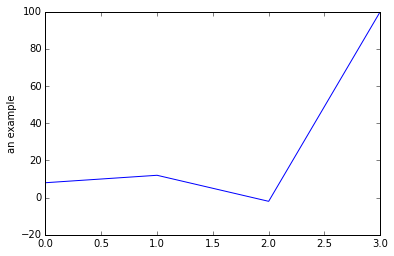

In [296]:
import matplotlib.pyplot as plt
plt.plot([8, 12, -2, 100])
plt.ylabel('an example')

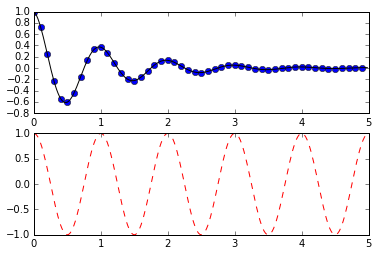

In [297]:
# This example is taken from the pyplot tutorial http://matplotlib.org/users/pyplot_tutorial.html
import numpy as np

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')